# <u><center><font color=red>GRIP - The Sparks Foundation</font></center></u>

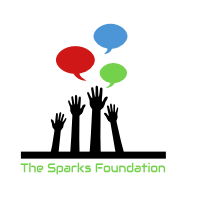

### <center>Internship on</center>


## <u><center><font color=darkblue>Data Science and Business Analytics</font></center></u>

### <center><font color='darkblue'>Author </font> :  Lavender Echessa</center>
 <br>

# <center>Task: Exploratory Data Analysis - Terrorism</center> 

### <font color='blue'>Objective</font>:
● Perform ‘Exploratory Data Analysis’ on dataset  ‘Global Terrorism’ 

● As a security/defense analyst, try to find out the hot zone of terrorism. 

● What all security issues and insights you can derive by EDA? 

### DATA PREPROCESSING

In [1]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
# Let's import to our data and check the basics.
terror = pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1')

In [3]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

    * There are to many columns, I didn't count them yet. But important things are the columns. Therefore we should look the columns and check what are they.

In [5]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
# I'm just take important data in whole dataset those I'm using further processing.
df=terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','success','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,success,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,1,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
# Checking the null velues in data
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
success             0
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [9]:
# Drop columns with a high number of missing values
df= df.drop(columns=['Motive', 'Summary'])

# Impute missing numerical values with the mean
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].interpolate(method='linear', inplace=True)

# Forward fill missing values in the 'state' column
df['state'].fillna(method='ffill', inplace=True)

# Display the updated DataFrame
df


,Year,Month,Day,Country,state,Region,city,latitude,longitude,success,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,1,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,1,Armed Assault,1.0,2.0,Checkpoint,Al-Shabaab,Military,Firearms
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,1,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,Muslim extremists,Military,Explosives
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,1,Facility/Infrastructure Attack,0.0,0.0,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,0,Bombing/Explosion,0.0,0.0,Office,Unknown,Government (General),Explosives


In [10]:
# Drop the row with a missing 'state'
df = df.dropna(subset=['state'])

# Fill missing values in 'city' with the most common city
df['city'].fillna(df['city'].mode()[0], inplace=True)

# Fill missing values in 'Killed' and 'Wounded' with zeros
df['Killed'].fillna(0, inplace=True)
df['Wounded'].fillna(0, inplace=True)

# Fill missing values in 'Target' with the most common target
df['Target'].fillna(df['Target'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
state          0
Region         0
city           0
latitude       0
longitude      0
success        0
AttackType     0
Killed         0
Wounded        0
Target         0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181690 entries, 1 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181690 non-null  int64  
 1   Month        181690 non-null  int64  
 2   Day          181690 non-null  int64  
 3   Country      181690 non-null  object 
 4   state        181690 non-null  object 
 5   Region       181690 non-null  object 
 6   city         181690 non-null  object 
 7   latitude     181690 non-null  float64
 8   longitude    181690 non-null  float64
 9   success      181690 non-null  int64  
 10  AttackType   181690 non-null  object 
 11  Killed       181690 non-null  float64
 12  Wounded      181690 non-null  float64
 13  Target       181690 non-null  object 
 14  Group        181690 non-null  object 
 15  Target_type  181690 non-null  object 
 16  Weapon_type  181690 non-null  object 
dtypes: float64(4), int64(4), object(9)
memory usage: 25.0+ MB


In [13]:
df.to_csv("updated_global_terrorism.csv", index=False)

In [14]:
print("Updated CSV file 'updated_global_terrorism.csv' has been created.")

Updated CSV file 'updated_global_terrorism.csv' has been created.


In [15]:
df1= pd.read_csv("updated_global_terrorism.csv")
df1

,Year,Month,Day,Country,state,Region,city,latitude,longitude,success,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
1,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
2,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,1,Bombing/Explosion,0.0,0.0,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
3,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
4,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,1,Armed Assault,0.0,0.0,Cairo Police Headquarters,Black Nationalists,Police,Firearms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181685,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,1,Armed Assault,1.0,2.0,Checkpoint,Al-Shabaab,Military,Firearms
181686,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,1,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,Muslim extremists,Military,Explosives
181687,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,1,Facility/Infrastructure Attack,0.0,0.0,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary
181688,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,0,Bombing/Explosion,0.0,0.0,Office,Unknown,Government (General),Explosives
